In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [265]:
train = pd.read_csv("../Kaggle-Diagnostic-Detectors/Raw_data/train.csv")
test = pd.read_csv("../Kaggle-Diagnostic-Detectors/Raw_data/test.csv")
spray = pd.read_csv("../Kaggle-Diagnostic-Detectors/Raw_data/spray.csv")
weather = pd.read_csv("../Kaggle-Diagnostic-Detectors/Raw_data/weather.csv")

In [266]:
train.shape

(10506, 12)

In [267]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [268]:
train["Date"]=pd.to_datetime(train["Date"])
test["Date"]=pd.to_datetime(test["Date"])

In [269]:
weather = pd.read_csv("../Kaggle-Diagnostic-Detectors/Raw_data/weather.csv")

In [270]:
weather.shape

(2944, 22)

In [271]:
train.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')

In [272]:
weather["Date"] = pd.to_datetime(weather["Date"])

for col in train1.columns:
    if train1[col].dtype == 'object': 
        print pd.crosstab(train1[col], train1["WnvPresent"]).apply(lambda r: r*100/r.sum(), axis=1)

In [273]:
test= pd.read_csv("Raw_data/test.csv")

In [274]:
test.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')

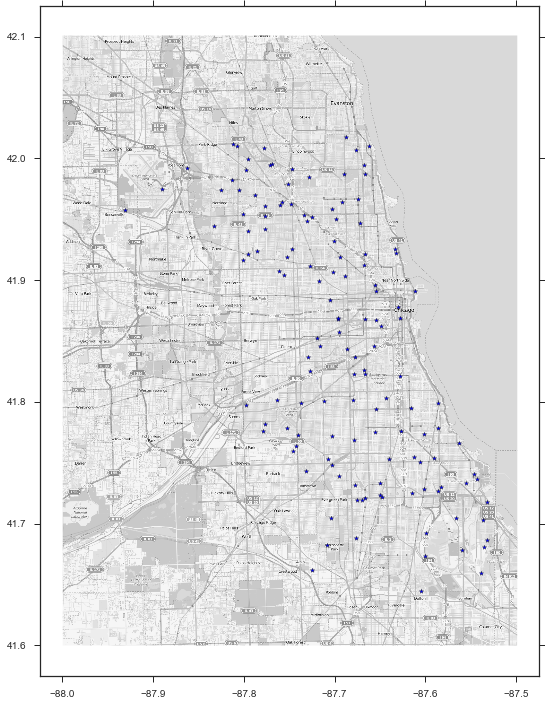

In [375]:
mapdata = np.loadtxt("../Kaggle-Diagnostic-Detectors/Raw_data/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../Kaggle-Diagnostic-Detectors/Raw_data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,12))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='*')


In [275]:
weather.loc[weather["Heat"]=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [276]:
weather_non_missing = weather.loc[weather["Heat"] <>'M']

In [277]:
weather_non_missing.loc[weather_non_missing["Station"] == 2]["Tavg"].astype("int").mean()

67.87816563997262

Label encode depth and snowfall

In [278]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
depth_code = encoder.fit_transform(weather["Depth"])
weather["Depth"] = depth_code

In [279]:
weather["Depth"].value_counts()

1    1472
0    1472
Name: Depth, dtype: int64

In [280]:
encoder = LabelEncoder()
snowfall_code = encoder.fit_transform(weather["SnowFall"])
weather["SnowFall"] = snowfall_code

In [281]:
weather["SnowFall"].value_counts()

3    1472
1    1459
0      12
2       1
Name: SnowFall, dtype: int64

In [282]:
weather.loc[weather["Depart"]=='M',"Depart"] = weather.loc[(weather["Depart"] <> 'M'), "Depart"].astype("int").mean()

In [283]:
weather = weather.replace('M', -99)
weather = weather.replace('-', -99)
weather = weather.replace('T', -99)
weather = weather.replace(' T', -99)
weather = weather.replace('  T', -99)

In [284]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [285]:
desc = weather.describe()
desc = desc.T
desc["Missing"] = weather.isnull().sum()
desc

,count,mean,std,min,25%,50%,75%,max,Missing
Station,2944.0,1.500000,0.500085,1.0,1.0,1.5,2.0,2.0,0
Tmax,2944.0,76.166101,11.461970,41.0,69.0,78.0,85.0,104.0,0
Tmin,2944.0,57.810462,10.381939,29.0,50.0,59.0,66.0,83.0,0
DewPoint,2944.0,53.457880,10.675181,22.0,46.0,54.0,62.0,75.0,0
Depth,2944.0,0.500000,0.500085,0.0,0.0,0.5,1.0,1.0,0
Water1,2944.0,-99.000000,0.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0
SnowFall,2944.0,1.996264,1.006091,0.0,1.0,2.5,3.0,3.0,0
ResultSpeed,2944.0,6.960666,3.587527,0.1,4.3,6.4,9.2,24.1,0
ResultDir,2944.0,17.494905,10.063609,1.0,7.0,19.0,25.0,36.0,0


In [286]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
test['year'] = pd.DatetimeIndex(test['Date']).year
test['month'] = pd.DatetimeIndex(test['Date']).month

In [287]:
test['week'] = pd.DatetimeIndex(test['Date']).week
train['week'] = pd.DatetimeIndex(train['Date']).week

In [288]:
test["Date"] = pd.to_datetime(test["Date"])

In [289]:
train['YearMonth'] = train['Date'].map(lambda x: 1000*x.year + x.month)
test['YearMonth'] = test['Date'].map(lambda x: 1000*x.year + x.month)

In [290]:
train_species = train.Species.value_counts()

In [291]:
test_species = test.Species.value_counts()

In [292]:
train_test_species = pd.concat([train_species,test_species], axis=1)

In [293]:
train_test_species.columns = ["Train_Sp_count", "Test_Sp_count"]

In [294]:
train_test_species

,Train_Sp_count,Test_Sp_count
CULEX ERRATICUS,1.0,14345
CULEX PIPIENS,2699.0,14521
CULEX PIPIENS/RESTUANS,4752.0,15359
CULEX RESTUANS,2740.0,14670
CULEX SALINARIUS,86.0,14355
CULEX TARSALIS,6.0,14347
CULEX TERRITANS,222.0,14351
UNSPECIFIED CULEX,NaN,14345


We do not have one of the species in train data... Oh... and look at the distribution.. Doesn't look similar at all in train and test.. :(

In [295]:
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Block'].values) + list(test['Block'].values))
train['Block'] = lbl.transform(train['Block'].values)
test['Block'] = lbl.transform(test['Block'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)


In [296]:
# Split station 1 and 2 and join horizontally
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [297]:
train1 = train.merge(weather, how='left', on='Date')
test1 = test.merge(weather, how='left', on='Date')

In [298]:
train1.drop(["Address", "Street", "NumMosquitos", "AddressNumberAndStreet", "CodeSum_y", "CodeSum_x", "Water1_x", "Water1_y"], axis=1,inplace=True)
train1.head()
test1.drop(["Address", "Street", "Id","AddressNumberAndStreet", "CodeSum_y", "CodeSum_x", "Water1_x", "Water1_y"], axis=1,inplace=True)
test1.head()

,Date,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,year,month,week,...,Sunrise_y,Sunset_y,Depth_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2008-06-11,2,26,1,41.95469,-87.800991,9,2008,6,24,...,-99,-99,1,3,0.00,29.34,29.97,9.4,18,10.4
1,2008-06-11,3,26,1,41.95469,-87.800991,9,2008,6,24,...,-99,-99,1,3,0.00,29.34,29.97,9.4,18,10.4
2,2008-06-11,1,26,1,41.95469,-87.800991,9,2008,6,24,...,-99,-99,1,3,0.00,29.34,29.97,9.4,18,10.4
3,2008-06-11,4,26,1,41.95469,-87.800991,9,2008,6,24,...,-99,-99,1,3,0.00,29.34,29.97,9.4,18,10.4
4,2008-06-11,6,26,1,41.95469,-87.800991,9,2008,6,24,...,-99,-99,1,3,0.00,29.34,29.97,9.4,18,10.4


In [299]:
train_blocks = pd.DataFrame(train1.Block.unique())

In [300]:
test_blocks = pd.DataFrame(test.Block.unique())

In [301]:
train_test_blocks = pd.concat([train_blocks,test_blocks], axis=1)
train_test_blocks.columns = ["train_blocks","test_blocks"]

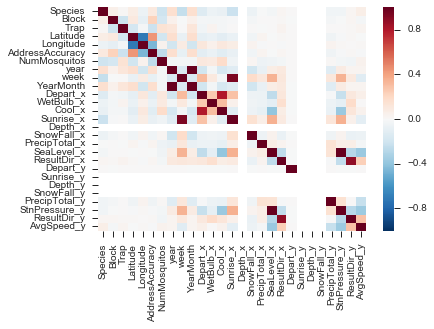

In [302]:
sns.heatmap(X_train.corr())

In [304]:
X = train1.drop(["WnvPresent","Date", "AvgSpeed_x", "Cool_y", "StnPressure_x", "WetBulb_y","Sunset_x", "Sunset_y","SeaLevel_y","Heat_x", "Heat_y","Tavg_x", "Tavg_y","Tmin_x","Tmax_x" ,"Tmax_y","Tmin_y", "DewPoint_x", "DewPoint_y","month", "ResultSpeed_x", "ResultSpeed_y"],axis=1)
y = train1["WnvPresent"]

In [306]:
test1 = test1.drop(["Cool_y", "StnPressure_x", "AvgSpeed_x","ResultSpeed_x", "ResultSpeed_y","WetBulb_y", "Sunset_x", "Sunset_y","Heat_x", "Heat_y","SeaLevel_y","Tavg_x", "Tavg_y","Tmax_x" ,"Tmax_y","Date","Tmin_x", "Tmin_y", "DewPoint_x", "DewPoint_y","month"],axis=1)

In [307]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import feature_selection, linear_model

We have longitude and latitude.. Do we need address in the data... I don't think it will add a lot more value, as it will have a lot more categories to start with... 

In [308]:
for col in train1.columns:
    if train1[col].dtype == "object":
        train1[col] = train1[col].astype("float64")
for col in test1.columns:
    if test1[col].dtype == "object":
        test1[col] = test1[col].astype("float64")

In [309]:
train1.dtypes

Date               datetime64[ns]
Species                     int64
Block                       int64
Trap                        int64
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
WnvPresent                  int64
year                        int32
month                       int32
week                        int32
YearMonth                   int64
Tmax_x                      int64
Tmin_x                      int64
Tavg_x                    float64
Depart_x                  float64
DewPoint_x                  int64
WetBulb_x                 float64
Heat_x                    float64
Cool_x                    float64
Sunrise_x                 float64
Sunset_x                  float64
Depth_x                     int64
SnowFall_x                  int64
PrecipTotal_x             float64
StnPressure_x             float64
SeaLevel_x                float64
ResultSpeed_x             float64
ResultDir_x                 int64
AvgSpeed_x    

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [311]:
X_train.shape

(8404, 26)

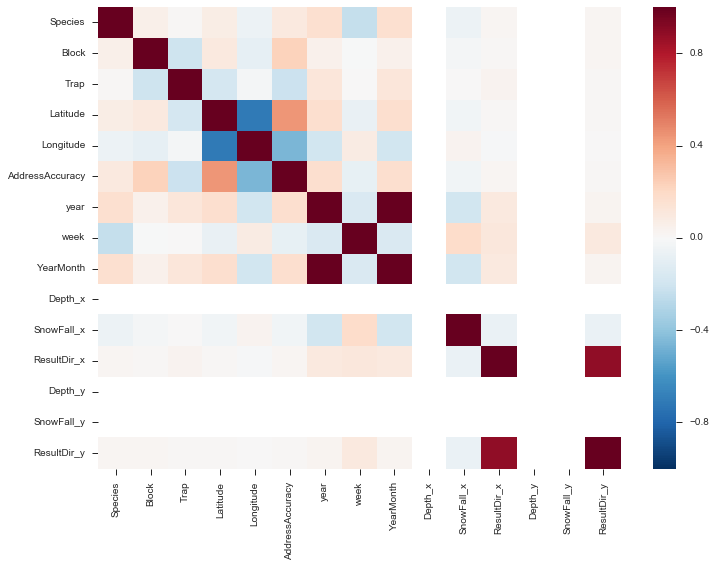

In [312]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(X_train.corr())

In [313]:
# Model selection
def score_model(clf):
    print ("model: {} ...".format(clf.__class__.__name__))
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3) 
    end = time.time()
    print("time: {:.3f}s".format(end - start))
    print("roc_auc: {:.3f}\n".format(scores.mean()))

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import time

score_model(DecisionTreeClassifier())
score_model(GaussianNB())
score_model(LogisticRegression())
score_model(RandomForestClassifier())

model: DecisionTreeClassifier ...
time: 0.113s
roc_auc: 0.626

model: GaussianNB ...
time: 0.067s
roc_auc: 0.785

model: LogisticRegression ...
time: 0.082s
roc_auc: 0.411

model: RandomForestClassifier ...
time: 0.265s
roc_auc: 0.722



In [315]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [316]:
nb_y_pred = nb_clf.predict(X_test)
print nb_clf.score(X_test,y_test)
nb_pred = pd.DataFrame(nb_clf.predict_proba(test1)[:,1])

0.8311132255


In [317]:
nb_pred[1:10]

,0
1,4.805569e-05
2,3.180124e-04
3,2.503065e-06
4,1.219326e-10
5,3.413955e-08
6,1.140404e-13
7,1.096626e-04
8,2.397602e-04
9,4.769697e-05


In [318]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [319]:
dtc_y_pred = dtc.predict_proba(X_test)
print dtc.score(X_test, y_test)
dtc_pred = pd.DataFrame(dtc.predict_proba(test1)[:,1])

0.929590865842


In [320]:
dtc_y_pred[:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [321]:
logreg = LogisticRegression(fit_intercept=True, C=0.0001)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [345]:
reg_y_pred = logreg.predict_proba(X_test)
print logreg.score(X_test,y_test)
logreg_pred = pd.DataFrame(logreg.predict_proba(test1)[:,1])

0.950999048525


In [334]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=5, min_samples_split=100, max_depth = 7,
                            min_samples_leaf=10,random_state=True,verbose=True)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=-1, oob_score=False, random_state=True,
            verbose=True, warm_start=False)

In [335]:
rf_pred = rf.predict(X_test)
print rf.score(X_test,y_test)
rf_pred_prob = pd.DataFrame(rf.predict_proba(test1)[:,1])

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


0.950999048525


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [326]:
X_train.columns

Index([u'Species', u'Block', u'Trap', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'year', u'week', u'YearMonth', u'Depart_x',
       u'WetBulb_x', u'Cool_x', u'Sunrise_x', u'Depth_x', u'SnowFall_x',
       u'PrecipTotal_x', u'SeaLevel_x', u'ResultDir_x', u'Depart_y',
       u'Sunrise_y', u'Depth_y', u'SnowFall_y', u'PrecipTotal_y',
       u'StnPressure_y', u'ResultDir_y', u'AvgSpeed_y'],
      dtype='object')

In [247]:
test1.columns

Index([u'Id', u'Species', u'Block', u'Trap', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'year', u'week', u'YearMonth', u'Depart_x',
       u'WetBulb_x', u'Cool_x', u'Sunrise_x', u'Depth_x', u'SnowFall_x',
       u'PrecipTotal_x', u'SeaLevel_x', u'ResultDir_x', u'AvgSpeed_x',
       u'Depart_y', u'Sunrise_y', u'Depth_y', u'SnowFall_y', u'PrecipTotal_y',
       u'StnPressure_y', u'ResultDir_y', u'AvgSpeed_y'],
      dtype='object')

In [220]:
rf_pred_prob[1:10]

,0
1,0.015416
2,0.001779
3,0.002703
4,0.052989
5,0.015892
6,0.000000
7,0.000000
8,0.107779
9,0.006297


In [351]:
Final_score = pd.concat([pd.DataFrame(nb_pred),pd.DataFrame(logreg_pred),pd.DataFrame(rf_pred_prob)], axis=1)

In [352]:
Final_score.columns = ["NB_pred", "Logreg_pred", "RF_pred"]

In [353]:
Final_score["Final"] = (Final_score["NB_pred"] + Final_score["Logreg_pred"] + Final_score["RF_pred"])/float(3)

In [354]:
Final_score

,NB_pred,Logreg_pred,RF_pred,Final
0,2.415630e-04,0.053438,0.009623,0.021101
1,4.805569e-05,0.053438,0.009623,0.021037
2,3.180124e-04,0.053438,0.006529,0.020095
3,2.503065e-06,0.053438,0.009623,0.021021
4,1.219326e-10,0.053438,0.009623,0.021021
5,3.413955e-08,0.053438,0.009623,0.021021
6,1.140404e-13,0.053438,0.009623,0.021021
7,1.096626e-04,0.053438,0.006529,0.020026
8,2.397602e-04,0.053438,0.009623,0.021101
9,4.769697e-05,0.053438,0.009623,0.021036


In [359]:
sample = pd.read_csv('../Kaggle-Diagnostic-Detectors/Raw_data/sampleSubmission.csv')
sample['WnvPresent'] = Final_score["Final"]
sample.head()
sample.to_csv("Submission_ensemble.csv", index = False)

In [361]:
Final = pd.concat([pd.DataFrame(nb_pred),pd.DataFrame(logreg_pred),pd.DataFrame(rf_pred_prob), pd.DataFrame(dtc_pred)], axis=1)
Final.columns = ["NB_pred", "Logreg_pred", "RF_pred", "DT_pred"]
Final["final_score"] = (Final["NB_pred"] + Final["Logreg_pred"] + Final["RF_pred"] + Final["DT_pred"])/float(4)

In [363]:
sample['WnvPresent'] = Final["final_score"]
sample.to_csv("Submission3.csv", index=False)